In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Источники ошибок в научных вычислениях

- Человеческий фактор 
- Ошибки, связанные с упрощением математической модели
- Ошибки во входных данных (из-за конечной точности в физических приборах
- Ошибки из-за сбоев в оборудовании или ошибок в программмах
- Ошибки усечения
- Ошибки округления
    

## Абсолютные и относительные ошибки

Заменяя некоторое значение $x$ его приближением $\widetilde{x}$, мы совершаем ошибку.
Величину этой ошибки характеризуют следующие значения:
*абсолютная ошибка*:
$$
   |\Delta x| = |\widetilde{x} - x|
$$
*относительная ошибка*:
$$
   |\Delta x|/|x| = \frac{|\widetilde{x} - x|}{|x|}
$$


In [2]:
import math

In [3]:
math.pi

3.141592653589793

In [4]:
import numpy as np

In [5]:
np.pi

3.141592653589793

In [6]:
abs(3.1415 - math.pi)

9.265358979293481e-05

In [7]:
abs(3.1415 - math.pi)/math.pi

2.9492553621508708e-05

In [8]:
abs(123124123123 - 123124000000)/123124000000

9.999918781066242e-07

Значение числа Авогадро, рекомендованное CODATA в 2010 г.:
$\mbox{NA}_{2010} = 6.022 141 29(27)\times 10^{23}~\mbox{моль}^{−1}$.

Значение числа Авогадро, рекомендованное CODATA в 2014 г.:
$\mbox{NA}_{2014} = 6.022 140 857(74)\times 10^{23}~\mbox{моль}^{−1}$.

Таким образом, если считать второе значение истинным, то первое имеет 7 верных значащих цифр.
Найдем абсолютную и относительную ошибки.

In [9]:
N_2010 = 6.02214129e23
N_2014 = 6.022140858e23
abs_err = abs(N_2010 - N_2014)
rel_err = abs_err/N_2014
print(abs_err, rel_err)

4.319999996146483e+16 7.173528647055242e-08


Напомним, что *десятичное представление*, или *десятичная форма записи* числа $\widetilde{x}$ - это
его запись в виде
$$
    \widetilde{x} = \pm (d_p \dots d_1 d_0.d_{-1} d_{-2} \dots d_{-r})_{10},
$$
где $0 \le d_i < 10$ ($i=p,\dots,1,0,-1,-2,\dots,-r$), т.е.
$$
    \widetilde{x} = \pm \left(d_p \cdot 10^p+\dots+d_1\cdot 10+d_0+\frac{d_{-1}}{10} + \frac{d_{-2}}{10^2} + \dots + \frac{d_{-r}}{10^r}\right).
$$
Используется также *научная форма записи*:
$$
    \widetilde{x} = \pm (d_0.d_{-1} d_{-2} \dots d_{-r})_{10} = 
		\pm \left(d_p \cdot 10^p+\dots+d_1\cdot 10+d_0+\frac{d_{-1}}{10} + \frac{d_{-2}}{10^2} + \dots + \frac{d_{-r}}{10^r}\right),
$$


Все цифры в десятичном представлении приближенного значения $\widetilde{x}$, кроме начальных нулей, называются {\em значащими цифрами.

Например, число $10.000$ содержит $5$ значащих цифр, а $0.001$ содержит одну значащую цифру. Здесь
и далее мы допускаем вольность речи, говоря что некоторое *число* имеет некоторое количество значащих цифр.
Правильнее говорить, что некоторая *запись* приближенного числа имеет некоторое количество значащих цифр.
Действительно, числа $10.000$ и $10$ равны, но в первой записи имеется $5$ значащих цифр, а во второй - две.

Значащая цифра $d_i$ в приближенном числе $\widetilde{x}$ называется *верной*, если
$$
|\widetilde{x} - x| \le \frac{10^i}{2},
$$
т.е. относительная ошибка не превосходит половины единицы разряда, соответствующего этой цифре. 
Например, если $x=\pi$, то в $\widetilde{x}=3.14$ все значащие цифры верные,
а в $\widetilde{x}=3.13$ и $\widetilde{x}=3.15$ верные только первые две.
Если какая-либо цифра числа верная, то все цифры, стоящие ранее (левее), тоже верные.
Термин <<верная цифра>> не нужно понимать буквально: верная значащая цифра не обязательно должна совпадать
с соответсвующими цифрами точного значения.
Пусть, например, $x=2$, тогда в $\widetilde{x}=1.9999$ все значащие цифры верные.
С другой стороны, если $x=\pi$, то $\widetilde{x}=3.1615$ содержит только $2$ верных значащих цифры (а не $4$).


Оказывается, что *если относительная ошибка приближенно равна $10^{-q}$, то
количество верных значащих цифр в десятичной записи числа $\widetilde x$
примерно равно $q$, и наоборот*. 
Приведенные выше примеры подтверждают это.
Сформулируем точное утверждение.

**Теорема 1.**
1. *Если $q$ - целое и
$$
  \frac{|\widetilde{x} - x|}{|x|} \le \frac{1}{2\cdot 10^q + 1} \approx 0.5\times 10^{-q},
$$
то $\widetilde x$ содержит не менее $q$ верных значащих десятичных цифр.*

2. *Если $q$ - целое и  
$$
  \frac{|\widetilde{x} - x|}{|x|} > \frac{1}{2\cdot 10^{q-1} - 1} \approx 0.5\times 10^{-q+1},
$$
то $\widetilde x$ содержит менее $q$ верных значащих десятичных цифр.*

*Доказательство.*
Докажем первую часть теоремы. Вторая доказывается аналогично.
Если $x$ и $\widetilde{x}$ имеют разные знаки, то относительная ошибка больше единицы и 
неравенство $|\widetilde{x} - x|/|x|\le 1/(2\cdot 10^q + 1)$ не возможно ни при каком целом $q$.
Теперь достаточно рассмотреть случай, когда оба $x$ и $\widetilde{x}$ положительны.

Пусть сначала $\widetilde{x} \ge x > 0$. 
Тогда
$$
\frac{|\widetilde{x} - x|}{|x|} =  \frac{\widetilde{x}}{x} - 1 \le \frac{1}{2\cdot 10^q + 1}, 
$$
откуда
$$
\frac{\widetilde{x}}{x} \le \frac{2\cdot 10^q + 2}{2\cdot 10^q + 1}, 
$$
поэтому
$$
\frac{x}{\widetilde{x}} \ge \frac{2\cdot 10^q + 1}{2\cdot 10^q + 2}, 
$$
следовательно,
$$
1 - \frac{x}{\widetilde{x}} \le 1 - \frac{2\cdot 10^q + 1}{2\cdot 10^q + 2} = \frac{1}{2\cdot 10^q + 2} 
< \frac{1}{2\cdot 10^q}. 
$$
Итак, 
$$
\frac{|\widetilde{x} - x|}{|\widetilde{x}|} < \frac{1}{2\cdot 10^q}. 
$$
Поэтому, если $10^{p-1} \le \widetilde{x} < 10^p$ для некоторого целого $p$, то
$|\widetilde{x} - x| < 10^{p-q}/2$,
что означает, что в $\widetilde{x}$ не менее $q$ верных значащих цифр.

Пусть теперь $x \ge\widetilde{x} >  0$. 
Тогда
$$
\frac{|\widetilde{x} - x|}{|x|} = \frac{x -\widetilde{x}}{x} = 1 - \frac{\widetilde{x}}{x} \le \frac{1}{2\cdot 10^q + 1}, 
$$
откуда
$$
\frac{\widetilde{x}}{x} \ge 1 - \frac{1}{2\cdot 10^q + 1} = \frac{2\cdot 10^q}{2\cdot 10^q + 1}, 
$$
поэтому
$$
\frac{x}{\widetilde{x}} \le 1 + \frac{1}{2\cdot 10^q}, 
$$
следовательно,
$$
\frac{x}{\widetilde{x}} - 1 \le \frac{1}{2\cdot 10^q}. 
$$
Итак, 
$$
\frac{|\widetilde{x} - x|}{|\widetilde{x}|} \le \frac{1}{2\cdot 10^q}. 
$$
Далее рассуждения аналогичны.


## Стандарт IEEE 754


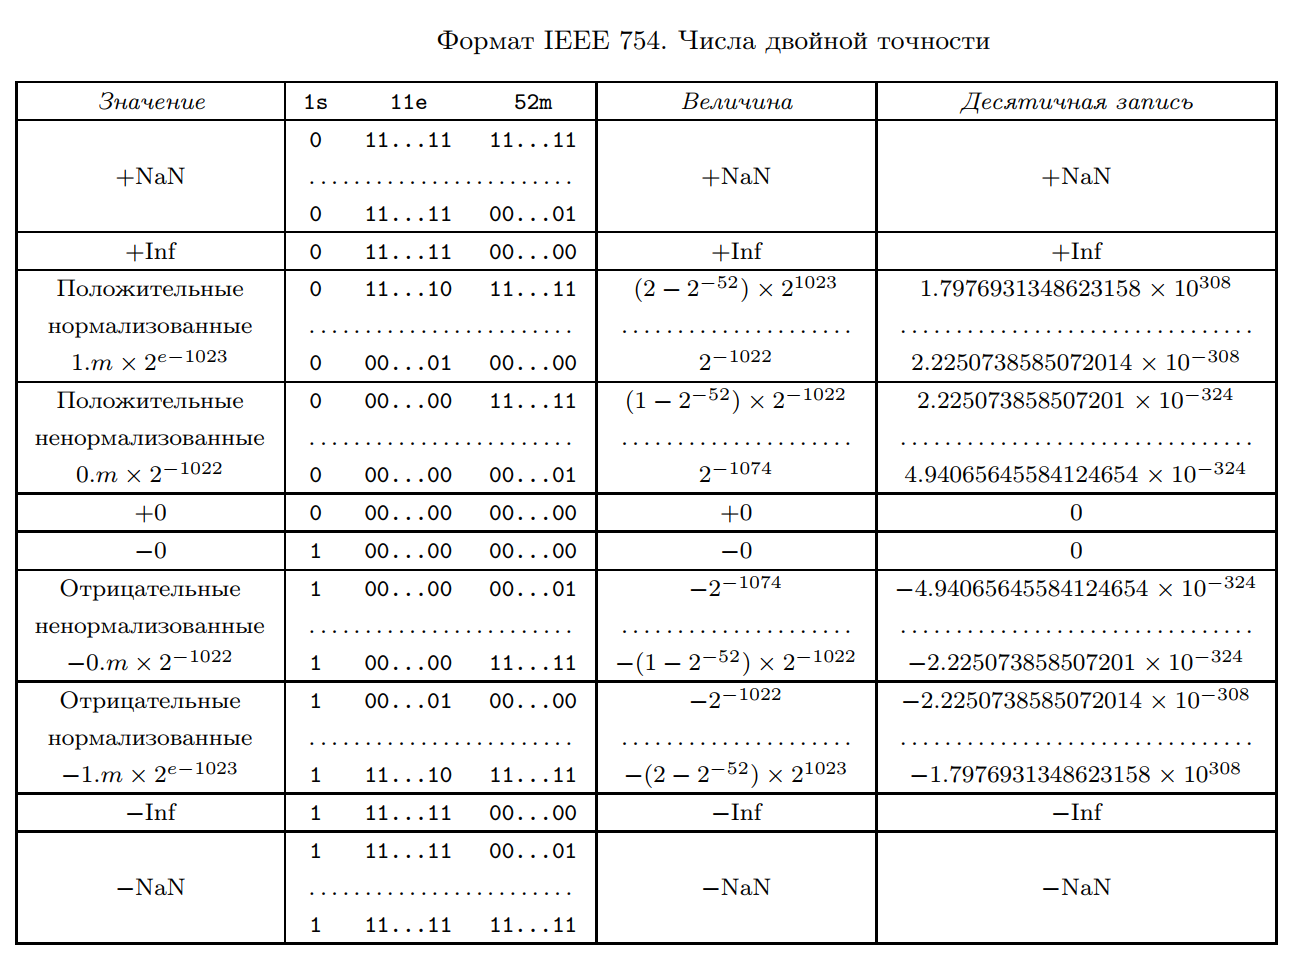


Машинное эпсилон - расстояние между единицей и следующим за ним числом в арифметике с плавающей запятой (двойной точности)

In [10]:
eps = 1.0
while 1.0 + eps > 1.0:
    eps /= 2
eps *= 2    
print(eps)

2.220446049250313e-16


In [11]:
2**(-52) == eps

True

In [13]:
import numpy as np

In [14]:
machmin  = 1.0
machmin2 = 0.5
while machmin2 > 0.0:
    machmin, machmin2 = machmin2, machmin/2
print(machmin)

5e-324


In [15]:
2**(-1074)==machmin

True

In [17]:
print(np.finfo(float)) # or np.float64

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



In [18]:
print(np.finfo(np.float32))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------



In [19]:
print(np.finfo(float).eps)
print(np.finfo(np.float32).eps)

2.220446049250313e-16
1.1920929e-07


In [20]:
# Объясните, почему следующий код возвращает macheps
eps = 7./3 - 4./3 - 1.0
print(eps)

2.220446049250313e-16


In [21]:
np.NaN # Not-a-Number

nan

In [22]:
np.Inf

inf

In [24]:
1e200*1e200

inf

In [25]:
np.Inf/np.Inf

nan

In [26]:
np.Inf - np.Inf

nan

In [27]:
121-np.NaN

nan

In [28]:
1.0/0.0

ZeroDivisionError: float division by zero

In [29]:
np.array([1.0])/0.0

<ipython-input-29-8ab46afc9295>:1: RuntimeWarning: divide by zero encountered in true_divide
  np.array([1.0])/0.0


array([inf])

## Численное дифференцирование

Рассмотрим задачу приближения производной заданной дифференцируемой функции $f(x)$.
Используя хорошо известную формулу Лагранжа
$$
    f(a+h) = f(a) + f'(a)h + \frac{f''(\xi)}{2}h^2, \qquad \mbox{где $\xi\in[a, a+h]$},
$$
получаем
$$
    f'(a) = \frac{f(a+h) - f(a)}{h} - f''(\xi)\frac{h}{2}.
$$
(предполагается, что $f''(x)$ непрерывна).
Представляется, что в арифметике без ошибок округления чем меньше $h$, тем приближение
$f'(a)$ разностным отношением
$$
    f'(a) \approx \frac{f(a+h) - f(a)}{h} \tag{*}
$$
точнее, так как для его ошибка равна
$$
    E_1  = \left|f'(a) - \frac{f(a+h) - f(a)}{h}\right| = \frac{|f''(\xi)| h}{2}.
$$
Разностное отношение ($*$)
иногда называют *правой разделенной разностью*.

Напишем программу, численно вычисляющую значение
производной в точке по формуле ($*$).

$E_1$ - величина ошибки усечения

In [30]:
np.logspace(-5, 5, 11)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])

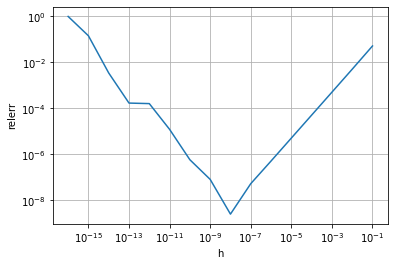

In [34]:
a = 1
expa = np.exp(a)
h = np.logspace(-1, -16, 16)
d = (np.exp(a + h) - expa)/h
relerr = abs(d - expa)/expa
plt.loglog(h, relerr )
plt.xlabel('h')
plt.ylabel('relerr')
plt.grid()

Из полученного графика видно, что относительная ошибка не убывает монотонно
с убыванием шага $h$. Она достигает своего минимального значения,
равного $2\times 10^{-8}$ при $h=h_{\min}=10^{-8}$,
а затем с уменьшением $h$
начинает возрастать. Это можно объяснить следующим образом.
Помимо ошибки усечения $E_1$, метод, реализованный на компьютере
содержит ошибки округления.
Предположим, что единственная ошибка этого типа происходит только при записи
вычисленных значений $f(a)$ и $f(a+h)$ в ячейку памяти.
Легко видеть, что абсолютная ошибка при вычислении разностного отношения составит
$$
    E_2 \le \frac{|f(a+h)| + |f(a)|}{h} \varepsilon_{\rm M} \approx \frac{2|f(a)|\varepsilon_{\rm M}}{h}. 
$$
Таким образом, ошибка округления в разностном отношении растет с уменьшением $h$.
Общая ошибка (ошибка <<усечения>> + ошибка округления) поэтому составит
$$
    E_1 + E_2 \approx \frac{M_2 h}{2} + \frac{2|f(a)|\varepsilon_{\rm M}}{h}.
$$
Правая часть этого приближенного равенства достигает своего минимального значения
при 
$$
    h = h_{\min} = 2\sqrt{\frac{|f(a)|\varepsilon_{\rm M}}{M_2}}.
$$
Если $|f(a)| \approx M_2$, то $h_{\min} \approx \sqrt{\varepsilon_{\rm M}}$.
Конечно, приводимые здесь приближенные равенства очень грубы,
но нас устраивает приближение $h_{\min}$ 
с точностью до порядка. Действительно, в рассматриваемом примере экспериментально
мы установили, что $h_{\min} = 10^{-8} \approx \sqrt{\varepsilon_{\rm M}}$.

Наряду с правой разделенной разностью \Ref{f_numdiff} для апроксимации производной можно
использовать *левую разделенную разность*
$$
    f'(a) \approx \frac{f(a) - f(a-h)}{h} 
$$
и *центральную разделенную разность*
$$
    f'(a) \approx \frac{f(a-h) - f(a+h)}{2h}
$$ 
Очевидно, что левая разделенная разность имеет  
первый порядок точности, как и правая.
Центральная разделенная разность имеет второй порядок точности.

Для численного нахождения производной функции, протабулированной
в равномерной сетке, удобна функция `diff`.
Если $a$ - вектор длины $n$, то `diff(a)`
возвращает вектор длины $n-1$, $i$-я компонента
которого равна $a(i+1)-a(i)$. Для матриц
@diff(a)@ работает по столбцам.

Для примера вычислим производные функции $e^x$ в наборе точек,
используя правую и центрально симметричную разности и построим графики.




In [36]:
np.diff([1,2,3,5,7,3])

array([ 1,  1,  2,  2, -4])

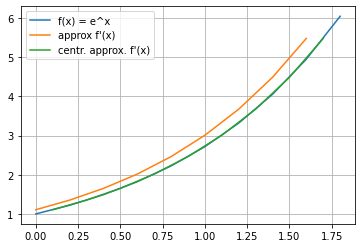

In [35]:
h = .2;
x = np.arange(0, 2, h);
y = np.exp(x);
d = np.diff(y)/h;
plt.plot(x, y, label = "f(x) = e^x")
plt.plot(x[:-1], d, label = "approx f'(x)")
plt.plot(x[:-1] + h/2, d, label = "centr. approx. f'(x)")
plt.grid()
plt.legend()
pass


Функция `diff(a, n)` находит $n$-ю разность, т.\,е.
применяет `diff` к `a` рекурсивно $n$ раз.


## Суммы и произведения

In [37]:
np.sum([1,2,3,4])

10

In [38]:
np.cumsum([1,2,3,4])

array([ 1,  3,  6, 10], dtype=int32)

In [39]:
np.prod([1,2,3,4])

24

In [40]:
np.cumprod([1,2,3,4])

array([ 1,  2,  6, 24], dtype=int32)

## Ряд Дирихле

$$
\sum_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6}
$$


In [41]:
N = 100
k = np.arange(1, N + 1, dtype=float)
a = k**(-2)
s = np.sum(a)
res = np.pi**2/6

In [42]:
s

1.6349839001848931

In [46]:
res

1.6449340668482264

In [44]:
N = 100
k = np.arange(1, N + 1, dtype=float)
a = k**(-2)
s = np.cumsum(a)

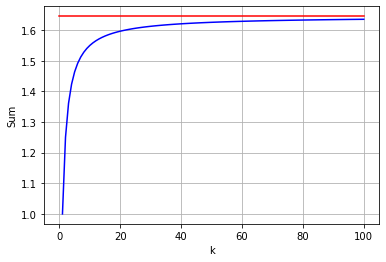

In [45]:
plt.plot(k, s, 'b')
plt.plot([0, N], [res, res], 'r')
plt.grid()
plt.xlabel('k')
plt.ylabel('Sum')

In [48]:
relerr = abs(s - res)/res

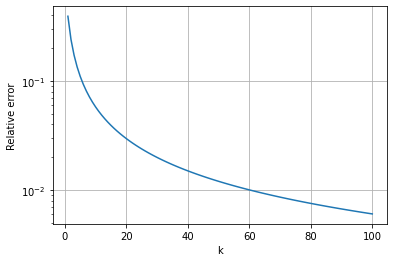

In [50]:
plt.semilogy(k, relerr)
plt.xlabel('k'); 
plt.ylabel('Relative error');
plt.grid()


Говорят, что последовательность $s_k$ сходится
к своему пределу $s$ *с линейной скоростью*, или
*со скоростью геометрической прогрессии* со знаменателем $q$ ($|q|<1$)
если 
$$
|s_{k+1} - s| \le q |s_k - s|
$$ 
для любого
достаточно большого $n$.
Из графика относительной ошибки видно, что сходимость рассматриваемого ряда
крайне медленная - ряд сходится медленнее, чем со скоростью
геометрической прогрессии.


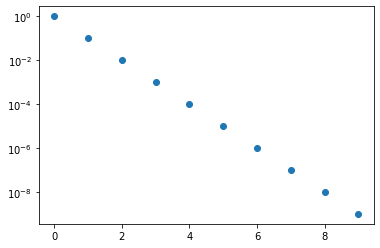

In [61]:
k = np.arange(0, 10)
s = np.logspace(0,-9,10)
plt.semilogy(k, s, 'o')
pass

$$
\log s = f(k)
$$

$$s_k = s_0 q^k$$

$$\log s = \log s_0 + k\log q$$

## Ряд Тейлора для экспоненты

$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots = \sum_{k=0}^{\infty} \frac{x^k}{k!}
\approx \sum_{k=0}^N \frac{x^k}{k!}
$$

In [106]:
%%time
x = -20   # try x = 1, 0.1, 2, 5, 10, -5, -10, -20
N = 200
k = np.arange(N + 1, dtype = float)
x_to_k = x**k                     # x^k
k_fact = np.cumprod(k[1:])        # k!
k_fact = np.hstack(([1], k_fact))
a_k = x_to_k/k_fact               # общий член ряда a_k
S_k = np.cumsum(a_k)              # частичная сумма

Wall time: 998 µs


In [107]:
v_prec = math.exp(x)
v_calc = S_k[-1]
err = abs(v_prec - v_calc)/v_prec
print(v_prec, v_calc, err)

2.061153622438558e-09 1.267348956286019e-09 0.3851263959710999


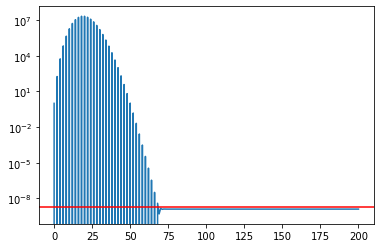

In [108]:
plt.semilogy(k, S_k)
plt.axhline(y = v_prec, color = 'r')
pass